## Predict Overall Score of FIFA Player

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_soccer = pd.read_csv("data.csv")

In [3]:
df_soccer.head()

Unnamed: 0      ID  ... GKReflexes  Release Clause
0           0  158023  ...        8.0         €226.5M
1           1   20801  ...       11.0         €127.1M
2           2  190871  ...       11.0         €228.1M
3           3  193080  ...       94.0         €138.6M
4           4  192985  ...       13.0         €196.4M

[5 rows x 89 columns]

In [4]:
df_soccer.shape

(18207, 89)

In [5]:
df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
df_soccer.describe()

Unnamed: 0             ID  ...  GKPositioning    GKReflexes
count  18207.000000   18207.000000  ...   18159.000000  18159.000000
mean    9103.000000  214298.338606  ...      16.388898     16.710887
std     5256.052511   29965.244204  ...      17.034669     17.955119
min        0.000000      16.000000  ...       1.000000      1.000000
25%     4551.500000  200315.500000  ...       8.000000      8.000000
50%     9103.000000  221759.000000  ...      11.000000     11.000000
75%    13654.500000  236529.500000  ...      14.000000     14.000000
max    18206.000000  246620.000000  ...      90.000000     94.000000

[8 rows x 44 columns]

In [7]:
df_soccer.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

## Let's clean the data 

In [8]:
#Lets take important stats
df = df_soccer[['ID','Name','Age','Overall','Potential','International Reputation', 'Stamina','Strength','Aggression','Composure','BallControl', 'Dribbling','Acceleration']]

In [9]:
df.head()

ID               Name  Age  ...  BallControl  Dribbling  Acceleration
0  158023           L. Messi   31  ...         96.0       97.0          91.0
1   20801  Cristiano Ronaldo   33  ...         94.0       88.0          89.0
2  190871          Neymar Jr   26  ...         95.0       96.0          94.0
3  193080             De Gea   27  ...         42.0       18.0          57.0
4  192985       K. De Bruyne   27  ...         91.0       86.0          78.0

[5 rows x 13 columns]

In [10]:
df.shape

(18207, 13)

In [11]:
df.isnull().any()

ID                          False
Name                        False
Age                         False
Overall                     False
Potential                   False
International Reputation     True
Stamina                      True
Strength                     True
Aggression                   True
Composure                    True
BallControl                  True
Dribbling                    True
Acceleration                 True
dtype: bool

In [12]:
def clean_df (df):
    
    copy = df
    
    mint = copy['International Reputation'].mean()
    copy['International Reputation'].loc[copy['International Reputation'].isnull()] = mint
    
    mst = copy['Stamina'].mean()
    copy['Stamina'].loc[copy['Stamina'].isnull()] = mst
    
    mstr = copy['Strength'].mean()
    copy['Strength'].loc[copy['Strength'].isnull()] = mstr
    
    mcomp = copy['Composure'].mean()
    copy['Composure'].loc[copy['Composure'].isnull()] = mcomp

    magr = copy['Aggression'].mean()
    copy['Aggression'].loc[copy['Aggression'].isnull()] = magr

    mball = copy['BallControl'].mean()
    copy['BallControl'].loc[copy['BallControl'].isnull()] = mball

    mdrib = copy['Dribbling'].mean()
    copy['Dribbling'].loc[copy['Dribbling'].isnull()] = mdrib

    macc = copy['Acceleration'].mean()
    copy['Acceleration'].loc[copy['Acceleration'].isnull()] = macc
    
    return copy

In [13]:
clean_df(df)
df.isnull().any()

ID                          False
Name                        False
Age                         False
Overall                     False
Potential                   False
International Reputation    False
Stamina                     False
Strength                    False
Aggression                  False
Composure                   False
BallControl                 False
Dribbling                   False
Acceleration                False
dtype: bool

In [14]:
df.describe()

ID           Age  ...     Dribbling  Acceleration
count   18207.000000  18207.000000  ...  18207.000000  18207.000000
mean   214298.338606     25.122206  ...     55.371001     64.614076
std     29965.244204      4.669943  ...     18.885426     14.908088
min        16.000000     16.000000  ...      4.000000     12.000000
25%    200315.500000     21.000000  ...     49.000000     57.000000
50%    221759.000000     25.000000  ...     61.000000     67.000000
75%    236529.500000     28.000000  ...     68.000000     75.000000
max    246620.000000     45.000000  ...     97.000000     97.000000

[8 rows x 12 columns]

<Figure size 1440x1440 with 0 Axes>

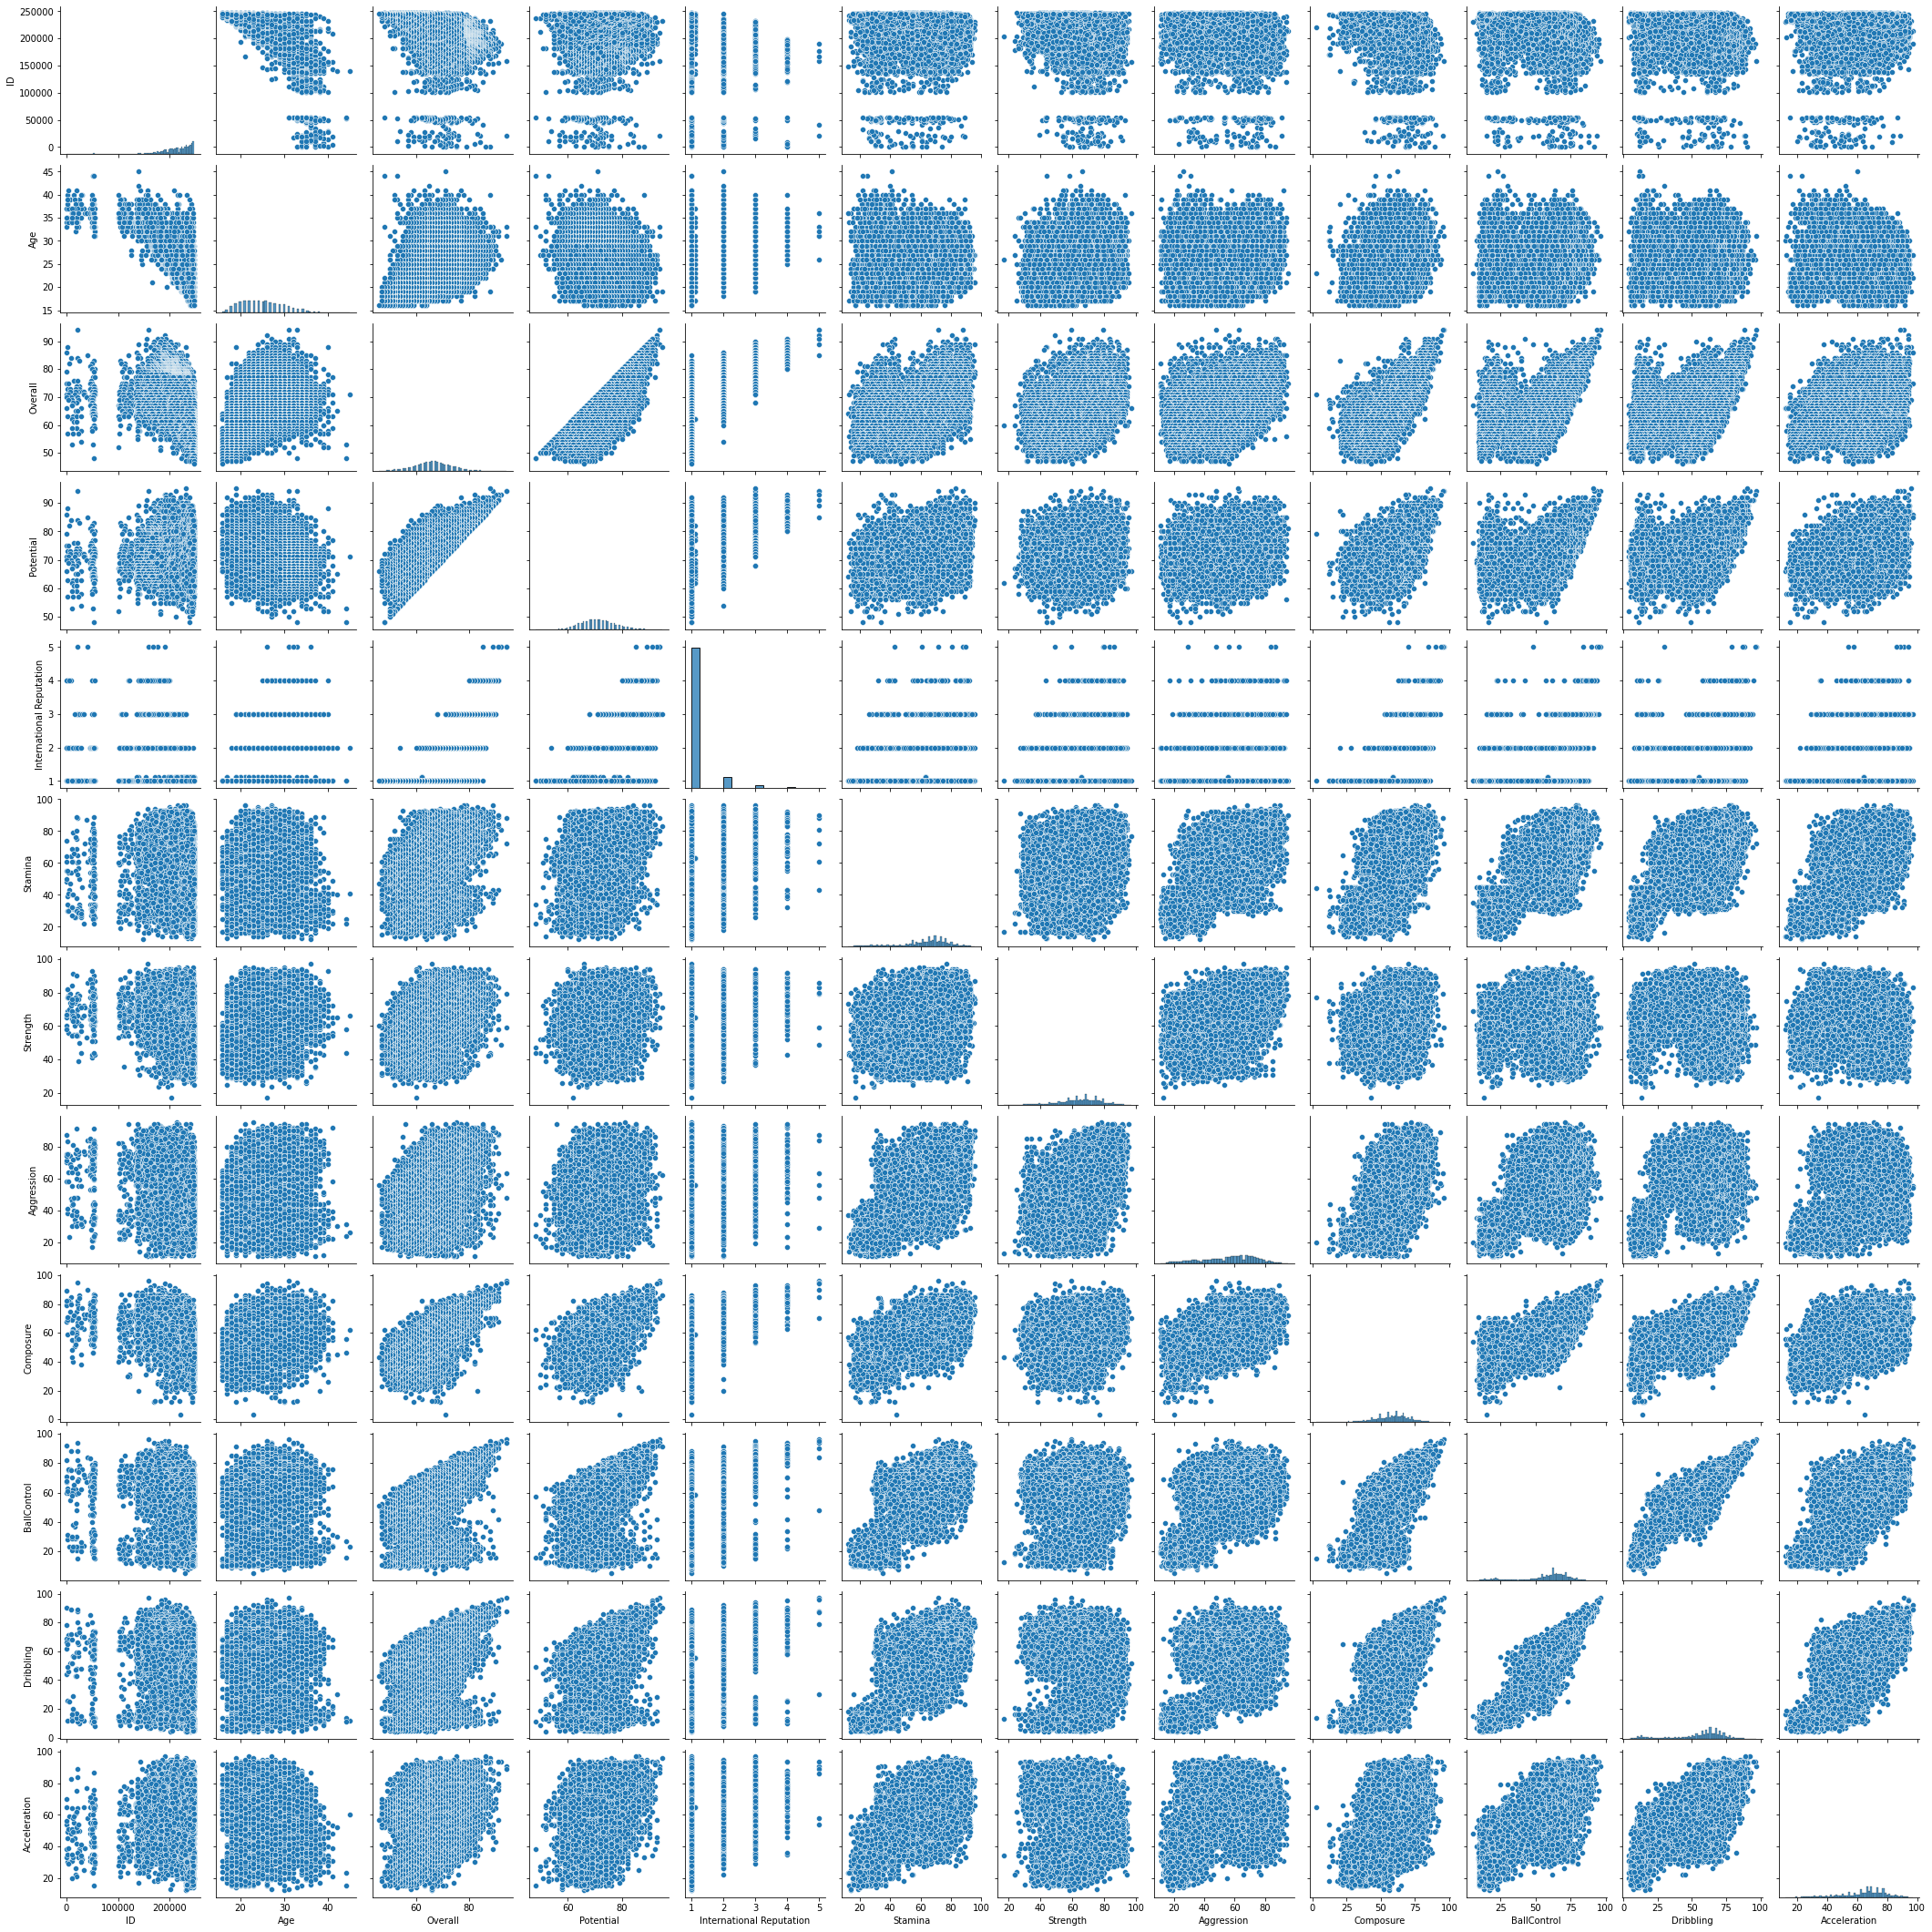

In [15]:
plt.figure(figsize=(20,20))
sns.pairplot(df)


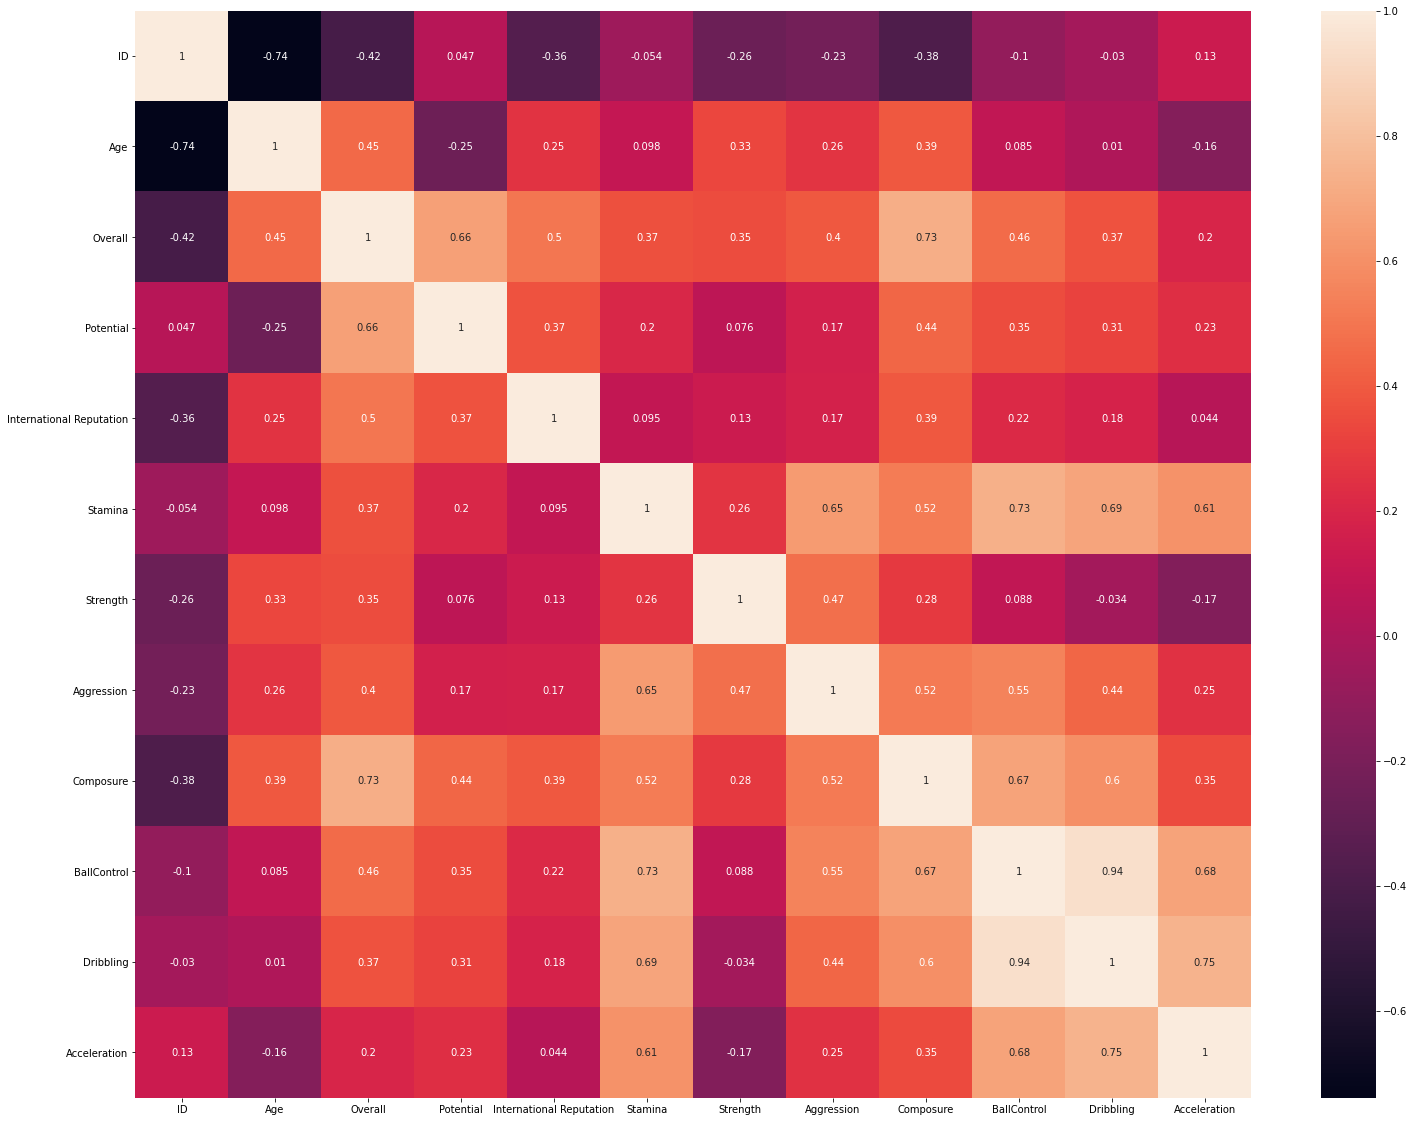

In [16]:
plt.subplots(figsize=(25,20))
sns.heatmap(df.corr(), annot=True);

## Let's now compare the potential of a player with other attributes present in the dataset

### Potential & Stamina

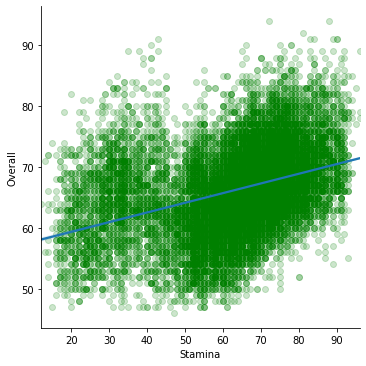

In [17]:
sns.lmplot(data=df, x='Stamina', y='Overall', scatter_kws={'alpha':0.2, 'color':'g'})

### Potential & Age

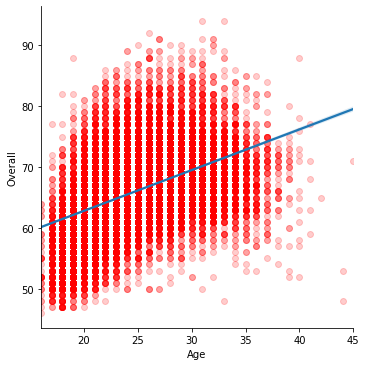

In [18]:
sns.lmplot(data=df, x='Age', y='Overall', scatter_kws={'alpha':0.2, 'color':'r'})

### Potential & International Reputation

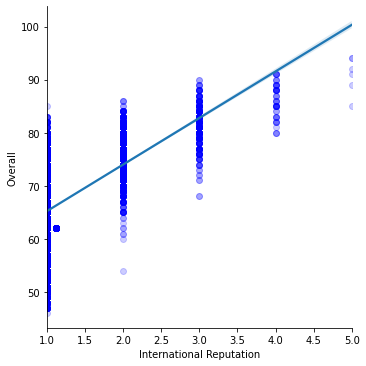

In [19]:
sns.lmplot(data = df, x ='International Reputation', y = 'Overall', scatter_kws={'alpha':0.2, 'color':'b'})

### Potential & Strength

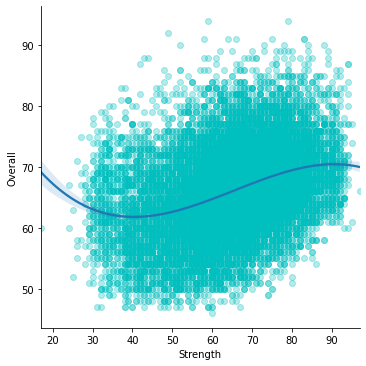

In [20]:
sns.lmplot(data = df, x='Strength', y='Overall',order=3, scatter_kws={'alpha':0.3, 'color':'c'})

### Potential & Dribbling

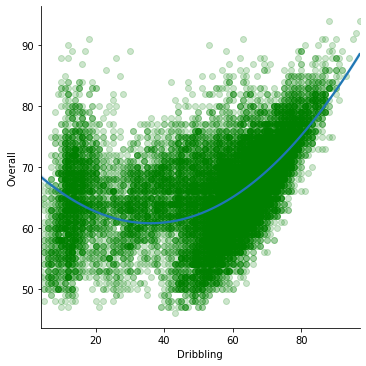

In [21]:
sns.lmplot(data = df, x='Dribbling', y='Overall',order=2, scatter_kws={'alpha':0.2, 'color':'g'})

### Potential & Acceleration

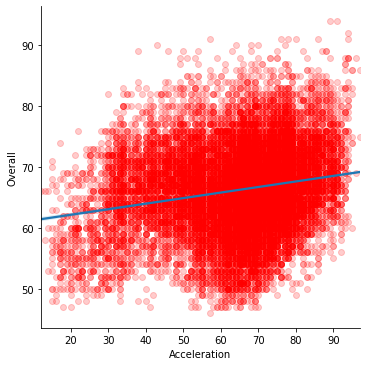

In [22]:
sns.lmplot(data = df, x='Acceleration', y='Overall', scatter_kws={'alpha':0.2, 'color':'r'})

### Potential & Ball Control

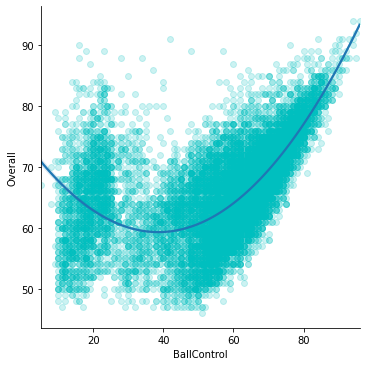

In [23]:
sns.lmplot(data = df, x='BallControl', y='Overall', order =2, scatter_kws={'alpha':0.2, 'color':'c'})

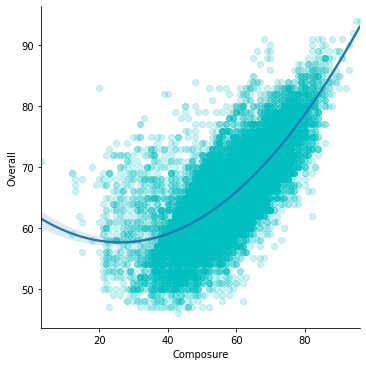

In [24]:
sns.lmplot(data = df, x='Composure', y='Overall', order =2, scatter_kws={'alpha':0.2, 'color':'c'})

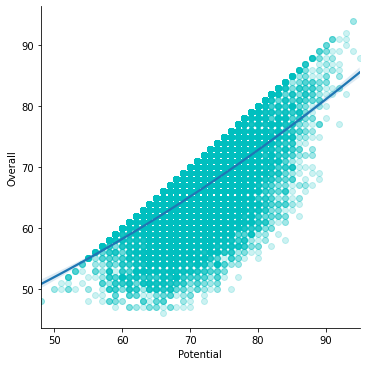

In [25]:
sns.lmplot(data = df, x='Potential', y='Overall', order =2, scatter_kws={'alpha':0.2, 'color':'c'})

# MODELING

In [26]:
#feature for basic model
Xb = df['BallControl']

#target
y = df['Overall']

## Linear Regression 

### Predicting the Overall Rating of a player based on his Ball Control

In [27]:
df.head()

ID               Name  Age  ...  BallControl  Dribbling  Acceleration
0  158023           L. Messi   31  ...         96.0       97.0          91.0
1   20801  Cristiano Ronaldo   33  ...         94.0       88.0          89.0
2  190871          Neymar Jr   26  ...         95.0       96.0          94.0
3  193080             De Gea   27  ...         42.0       18.0          57.0
4  192985       K. De Bruyne   27  ...         91.0       86.0          78.0

[5 rows x 13 columns]

### Overall vs Potential

<Figure size 720x360 with 0 Axes>

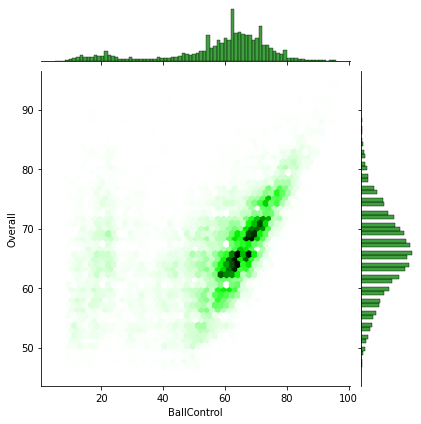

In [28]:
plt.figure(figsize=[10,5])
sns.jointplot(x=df.BallControl,y=df.Overall,kind='hex',color='green')
plt.show()

In [29]:
Xb.head()

0    96.0
1    94.0
2    95.0
3    42.0
4    91.0
Name: BallControl, dtype: float64

In [30]:
y.head()

0    94
1    94
2    92
3    91
4    91
Name: Overall, dtype: int64

In [31]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb , y,test_size=0.2, random_state=80)

In [32]:
lr = LinearRegression()

Xb_train = np.array(Xb_train)
yb_train = np.array(yb_train)

Xb_train = Xb_train.reshape(-1,1)
yb_train = yb_train.reshape(-1,1)

Xb_test = np.array(Xb_test)
Xb_test = Xb_test.reshape(-1,1)

yb_test = np.array(yb_test)
yb_test = yb_test.reshape(-1,1)

lr.fit(Xb_train, yb_train)
y_pred_lr = lr.predict(Xb_test)

print('Training Set Accuracy: {}'.format(lr.score(Xb_train, yb_train)))
print('Test Set Accuracy: {}'.format(lr.score(Xb_test, yb_test)))
print("Mean Squared Error: "  + str(metrics.mean_squared_error(yb_test, y_pred_lr)))

Training Set Accuracy: 0.2124643903279103
Test Set Accuracy: 0.20798656696224974
Mean Squared Error: 38.17140554542601


## Plotting the training data

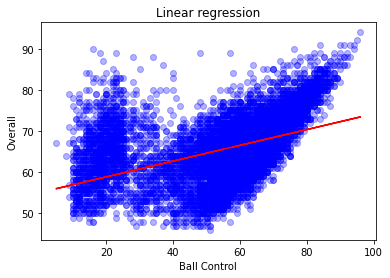

In [33]:
plt.scatter(Xb_train,yb_train,color='blue',alpha=0.3)
plt.xlabel('Ball Control')
plt.ylabel('Overall')
plt.title('Linear regression')
plt.plot(Xb_train,lr.predict(Xb_train),color='red')
plt.show()

## Plotting the test data

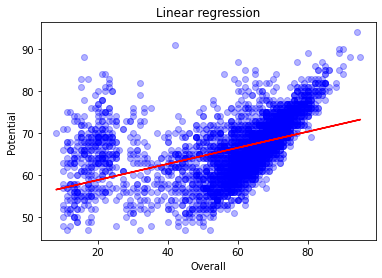

In [34]:
plt.scatter(Xb_test,yb_test,color='blue',alpha=0.3)
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.title('Linear regression')
plt.plot(Xb_test,y_pred_lr,color='red')
plt.show()

In [35]:
print("Intercept: " + str(lr.intercept_))

Intercept: [55.04456677]


In [36]:
print("Coefficient: " + str(lr.coef_))

Coefficient: [[0.19159836]]


## Multiple Regression Model

In [37]:
#full features for training
X = df[['International Reputation', 'Stamina','Strength','Aggression','Composure','BallControl', 'Dribbling','Acceleration', 'Potential']]

In [38]:
X.head()

International Reputation  Stamina  ...  Acceleration  Potential
0                       5.0     72.0  ...          91.0         94
1                       5.0     88.0  ...          89.0         94
2                       5.0     81.0  ...          94.0         93
3                       4.0     43.0  ...          57.0         93
4                       4.0     90.0  ...          78.0         92

[5 rows x 9 columns]

In [39]:
X.isnull().any()

International Reputation    False
Stamina                     False
Strength                    False
Aggression                  False
Composure                   False
BallControl                 False
Dribbling                   False
Acceleration                False
Potential                   False
dtype: bool

In [40]:
y.head()

0    94
1    94
2    92
3    91
4    91
Name: Overall, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Training Set Accuracy: {}'.format(lr.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(lr.score(X_test, y_test)))
print("Mean Squared Error: "  + str(metrics.mean_squared_error(y_test, y_pred_lr)))

Training Set Accuracy: 0.7284827881800222
Test Set Accuracy: 0.7148054795856863
Mean Squared Error: 13.377326959118435


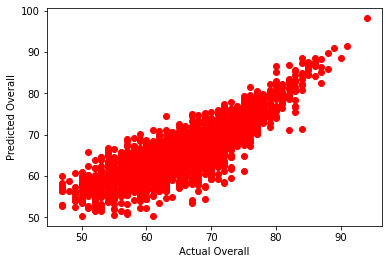

In [43]:
plt.scatter(y_test,y_pred_lr, color='red')
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

In [44]:
print("Intercept: " + str(lr.intercept_))

Intercept: 9.454089822685859


In [45]:
print("Coefficients: " + str(lr.coef_))

Coefficients: [ 2.71320582  0.0216642   0.08331449 -0.00715443  0.2901242   0.01162714
 -0.03830562 -0.00601078  0.45120117]


In [46]:
import statsmodels.api as smo
regsum = smo.OLS(endog=y, exog=X).fit()

In [47]:
regsum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Overall   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          6.581e+05
Date:                Mon, 19 Apr 2021   Prob (F-statistic):                        0.00
Time:                        19:38:42   Log-Likelihood:                         -49585.
No. Observations:               18207   AIC:                                  9.919e+04
Df Residuals:                   18198   BIC:                                  9.926e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
International Reputation     2.4724      0.078     31.534      0.000       2.319       2.626
Stamina                      0.0231      0.003      7.566      0.000       0.017       0.029
Strength                     0.1075      0.003     41.375      0.000       0.102       0.113
Aggression                  -0.0085      0.002     -3.532      0.000      -0.013      -0.004
Composure                    0.2913      0.004     78.365      0.000       0.284       0.299
BallControl                  0.0059      0.006      1.051      0.293      -0.005       0.017
Dribbling                   -0.0499      0.005    -10.249      0.000      -0.059      -0.040
Acceleration                 0.0181      0.003      6.134      0.000       0.012       0.024
Potential                    0.5552      0.003    170.067      0.000       0.549       0.562
==============================================================================
Omnibus:                      299.349   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.310
Skew:                          -0.125   Prob(JB):                    3.82e-114
Kurtosis:                       3.791   Cond. No.                         508.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### All the P-values show that all the variables are significant. Also, adjusted R-Squared(0.997) means that the model explains 99.7 % variables in dependent variable. 

In [58]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor


regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(X_train,y_train)

# Predicting test results
y_pred_t = regressor_Tree.predict(X_test)

print('Training Set Accuracy: {}'.format(regressor_Tree.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(regressor_Tree.score(X_test, y_test)))
print("Mean Squared Error: "  + str(metrics.mean_squared_error(y_test, y_pred_t)))

Training Set Accuracy: 1.0
Test Set Accuracy: 0.7693166295915305
Mean Squared Error: 10.820428336079077


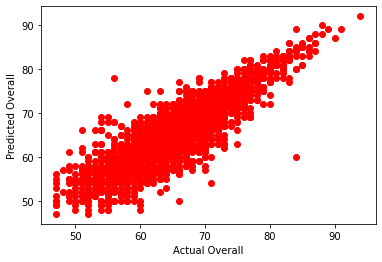

In [59]:
plt.scatter(y_test,y_pred_t, color='red')
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

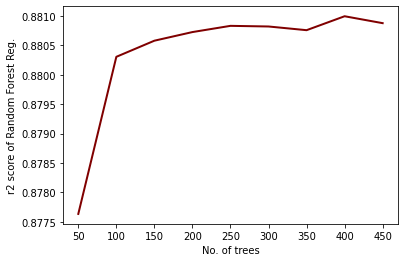

In [60]:
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=80)
    regressor_Forest.fit(X_train,y_train)
    y_pred = regressor_Forest.predict(X_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()

In [61]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=300,random_state=80)
regressor_Forest.fit(X_train,y_train)
y_pred_rf = regressor_Forest.predict(X_test)

print('Training Set Accuracy: {}'.format(regressor_Forest.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(regressor_Forest.score(X_test, y_test)))
print("Mean Squared Error: "  + str(metrics.mean_squared_error(y_test, y_pred_rf)))

Training Set Accuracy: 0.9834385152420317
Test Set Accuracy: 0.8808233475690954
Mean Squared Error: 5.590097043748855


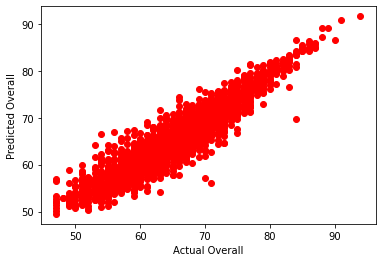

In [62]:
plt.scatter(y_test,y_pred, color='red')
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

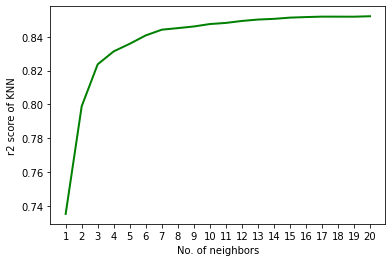

In [63]:
knnRange = range(1,21,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(X_train,y_train)
    y_pred = regressor_knn.predict(X_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()

In [64]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=6)
regressor_knn.fit(X_train,y_train)
y_pred_knn = regressor_knn.predict(X_test)

print('Training Set Accuracy: {}'.format(regressor_knn.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(regressor_knn.score(X_test, y_test)))
print("Mean Squared Error: "  + str(metrics.mean_squared_error(y_test, y_pred_knn)))

Training Set Accuracy: 0.8876083481414984
Test Set Accuracy: 0.8407879406640287
Mean Squared Error: 7.467996827140155


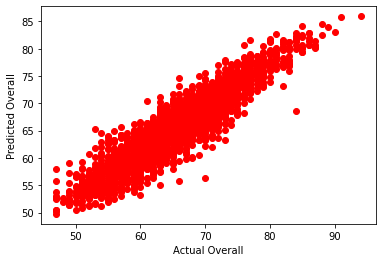

In [65]:
plt.scatter(y_test,y_pred, color='red')
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

In [66]:
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train,y_train)

y_pred_xgb = regressor_xgb.predict(X_test)

print('Training Set Accuracy: {}'.format(regressor_xgb.score(X_train, y_train)))
print('Test Set Accuracy: {}'.format(regressor_xgb.score(X_test, y_test)))
print("Mean Squared Error: "  + str(metrics.mean_squared_error(y_test, y_pred_xgb)))

[19:48:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Set Accuracy: 0.8722334468447993
Test Set Accuracy: 0.8582103409470982
Mean Squared Error: 6.650782160250074


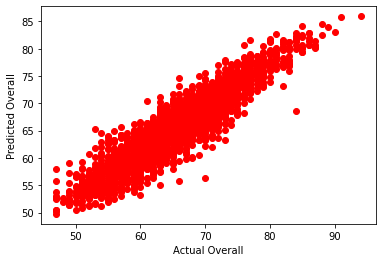

In [67]:
plt.scatter(y_test,y_pred, color='red')
plt.xlabel("Actual Overall")
plt.ylabel("Predicted Overall")
plt.show()

In [73]:
## Comparing the MSE scores of different models
labelList = ['Multiple Linear Reg.','K-NearestNeighbors','Decision Tree','Random Forest','XGBoost']
mylist = [metrics.mean_squared_error(y_test, y_pred_lr), metrics.mean_squared_error(y_test, y_pred_knn), 
          metrics.mean_squared_error(y_test, y_pred_t),metrics.mean_squared_error(y_test, y_pred_rf), 
          metrics.mean_squared_error(y_test, y_pred_xgb)]

for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i],decimals=2)
print(mylist)

[57.46, 7.47, 10.82, 5.59, 6.65]


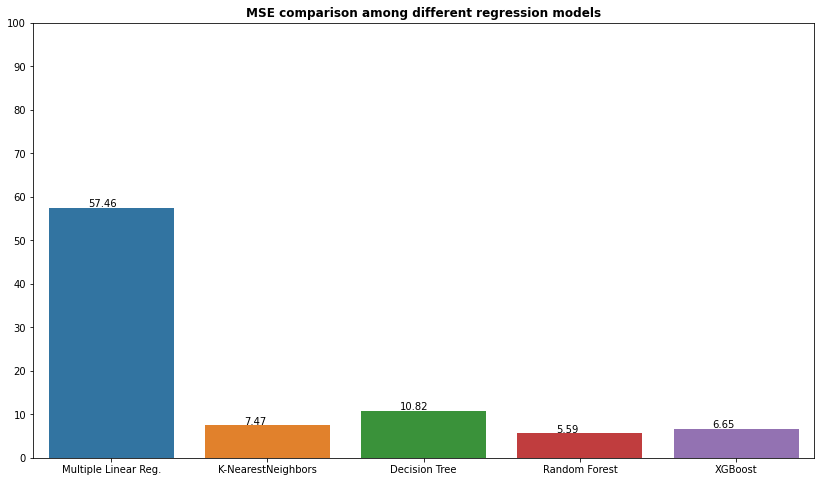

In [75]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('MSE comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x +0.25, y + height + 0.25))
plt.show()